<a href="https://colab.research.google.com/github/SaniyaBubere/Bank-Marketing/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statment
The objective of this project is to analyze a dataset of bank marketing campaign results and gain insights that can inform future marketing campaigns. 

### Importing Libraries

In [154]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline
#for data time manipulation
import datetime
from pandas.api.types import CategoricalDtype
import plotly.express as px


### **Dataset Loading**

In [155]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Reading File
df = pd.read_csv("/content/drive/MyDrive/bank.csv")

### **Dataset First View**

In [157]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### **Dataset Rows & Columns count**

In [158]:
# Get the number of rows and columns
rows, columns = df.shape

In [159]:
# Print the number of rows and columns
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  11162
Number of columns:  17


We have 11162 Rows and 17 Columns

### **Dataset Information**

In [160]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


We Don't have any Null Values in the Dataset

#### **Duplicate Values**

In [161]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()


False    11162
dtype: int64

We Don't have Duplicates Values in the Dataset

### **What did you know about your dataset?**

The dataset appears to be related to a marketing campaign for a bank, as it includes information about individuals who were contacted by the bank and whether or not they made a deposit. The dataset contains information about the individuals' age, job, marital status, education, default history, balance, housing status, loan status, contact method, month of contact, duration of contact, number of contacts during the campaign, number of days since the last contact from a previous campaign, number of previous contacts, and the outcome of the previous campaign.

## ***2. Understanding Your Variables***

In [162]:
#Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [163]:
# Dataset Describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### **Check Unique Values for each variable.**

In [164]:
# Function to get all unique values
def get_all_unique_values(df):
  # Function to get all unique values
    for col in df.columns:
        print(f"Unique values in column '{col}':")
        print(df[col].unique())
        print()

In [165]:
# Get and print all unique values
get_all_unique_values(df)

Unique values in column 'age':
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]

Unique values in column 'job':
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

Unique values in column 'marital':
['married' 'single' 'divorced']

Unique values in column 'education':
['secondary' 'tertiary' 'primary' 'unknown']

Unique values in column 'default':
['no' 'yes']

Unique values in column 'balance':
[2343   45 1270 ... 1594 2593 -134]

Unique values in column 'housing':
['yes' 'no']

Unique values in column 'loan':
['no' 'yes']

Unique values in column 'contact':
['unknown' 'cellular' 'telephone']

Unique values in column 'day':
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 1

### **Variables Description** 

age: the age of the individual contacted by the bank (numeric)

job: Type of job the individual has (categorical: 'admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'self-employed', 'student')

marital: Marital status of the individual (categorical: 'married', 'single', 'divorced')

education:level of education of the individual (categorical: 'primary', 'secondary', 'tertiary', 'unknown')

default: Individual's has a history of defaulting on credit (binary: 'yes', 'no')

balance: Current balance in the individual's bank account (numeric)

housing: Individual has a housing loan or not (binary: 'yes', 'no')

loan:  Individual has a personal loan or not (binary: 'yes', 'no')

contact: the method of communication used to contact the individual (categorical: 'unknown', 'telephone', 'cellular')

day: the day of the month when the individual was last contacted (numeric)

month: the month of the year when the individual was last contacted (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

duration: the duration of the last contact with the individual (numeric, in seconds)

campaign: The "campaign" column represents the number of times the bank has made contact with a particular individual during the current marketing campaign. Each time the bank reaches out to the individual by phone, email, or another method of communication, it counts as one "contact".

For example, if the bank called a person twice and sent them an email once during the current marketing campaign, then the value in the "campaign" column for that person would be 3.

pdays: the number of days that passed since the individual was last contacted by the bank in a previous campaign (numeric, -1 indicates that the individual was not previously contacted)

previous: the number of contacts performed before this campaign for this individual (numeric)

poutcome: the outcome of the previous marketing campaign for this individual (categorical: 'unknown', 'other', 'failure', 'success')

deposit: whether or not the individual made a deposit (binary: 'yes', 'no')

In [166]:
#value count of marital column
df["marital"].value_counts(normalize = True)

married     0.568984
single      0.315176
divorced    0.115839
Name: marital, dtype: float64

As we can see, 57% (0.56) of clients are married, which must be taken into account when planning marketing campaigns to manage deposit operations.

In [167]:
# value counts of deposit column i.e target column
df["deposit"].value_counts(normalize = True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

We have 52-48 % distribution thats okk for valueable insights

In [168]:
# Sorting the value by age as ascending and duration as descending
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3494,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
2498,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
2935,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
2654,18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
2464,18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes


We see that the youngest customers are at the age of 18, and the call duration exceeded 7 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.

In [169]:
# Now sorting with duration column as descendsing to view highest duration of call
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
271,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
7198,30,admin.,married,secondary,no,1310,no,no,telephone,27,oct,3284,1,-1,0,unknown,no
883,36,self-employed,single,tertiary,no,-103,yes,yes,telephone,17,oct,3253,1,-1,0,unknown,yes
358,28,admin.,single,secondary,no,-7,no,yes,unknown,26,jun,3183,2,-1,0,unknown,yes
4364,53,admin.,married,secondary,no,849,yes,no,cellular,6,feb,3102,3,-1,0,unknown,yes



The sorting results show that the longest calls exceed one hour, as the value duration is more than 3600 seconds or 1 hour. At the same time, it usually was on January and October.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [170]:
# max value of each column
df.max()

age               95
job          unknown
marital       single
education    unknown
default          yes
balance        81204
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        3881
campaign          63
pdays            854
previous          58
poutcome     unknown
deposit          yes
dtype: object

In [171]:
# if the call duration is iqual to 0, then is obviously that this person didn't subscribed
df[(df['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed

In [172]:
# df['deposit'] = df['deposit'].replace(['yes', 'no'], [1,0])
# Looking for mean which deposite is yess
df[df["deposit"] == "yes"].mean() 

age           41.670070
balance     1804.267915
day           15.158253
duration     537.294574
campaign       2.141047
pdays         68.702968
previous       1.170354
dtype: float64

On average, the attracted clients have a mean age of 41.67 years, while it took an average of 2.14 campaign calls to attract them.

### Max Min and Mean Duration time in Minutes

In [173]:
# Calculating Max,Min and Mean of Duration
print("Max duration  call in minutes:  ", round((df['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((df['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((df['duration'].mean()/60),1))

Max duration  call in minutes:   64.7
Min duration  call in minutes:    0.0
Mean duration call in minutes:    6.2


### What is the average call duration for the attracted clients?

In [174]:
import math

# Calculates the average call duration for attracted clients 
average_cal_duration = df[df["deposit"] == "yes"]["duration"].mean()

if math.isnan(average_cal_duration):
    print("No data available")
else:
    average_cal_duration = round(average_cal_duration, 2)
    average_cal_duration_in_min = average_cal_duration // 60
    print("Average call duration for attracted clients =", average_cal_duration_in_min, "min", int(average_cal_duration) % 60, "sec")


Average call duration for attracted clients = 8.0 min 57 sec


So, the average duration of a successful call is almost 537 seconds, that is, nearly 9 minutes.

In [175]:
#  Replace a single value with a new value for an individual DataFrame column:
df['poutcome'] = df['poutcome'].replace(['unknown'],'other')
df['education'] = df['education'].replace(['unknown'],'other')
df['loan'] = df['loan'].replace(['unknown'],'other')
df['default'] = df['default'].replace(['unknown'],'other')


### Sorting the Month Column

In [176]:
# Sorting the Month column

# Define the custom sort order
custom_order = CategoricalDtype(categories=["jan", "feb", "apr", "may","jun","jul","aug","sep"], ordered=True)

# Convert the "month" column to the custom data type
df["month"] = df["month"].astype(custom_order)

# Sort the DataFrame by the "month" column
df_sorted = df.sort_values("month")


### Making Category of balance column No Balance,Low Balance,Average Balance,High Balance and creating new column for same


In [177]:
# Making Category of balance column on the basis of conditions and creating new column for same
df.loc[df["balance"] <= 0,  'balance_group'] = 'no balance'
df.loc[(df["balance"] > 0) & (df["balance"] <= 1000), 'balance_group'] = 'low balance'
df.loc[(df["balance"] > 1000) & (df["balance"] <= 5000), 'balance_group'] = 'average balance'
df.loc[(df["balance"] > 5000), 'balance_group'] = 'high balance'

To facilitate trend identification, we can divide clients into four categories based on their balance levels. The first category is "No Balance," which includes clients with a negative balance. The second category is "Low Balance," comprising clients with balances ranging from 0 to 1000 euros. The third category, "Average Balance," includes clients with balances between 1000 and 5000 euros. The last category, "High Balance," consists of clients with balances exceeding 5000 euros. This categorization can help us analyze the data more efficiently and identify patterns or trends that may not have been apparent before.


* No Balance: clients who have a negative balance.

* Low Balance: clients who have a balance between 0 and 1000 euros.

* Average Balance: clients who have a balance between 1000 and 5000 euros.

* High Balance: clients who have a balance greater than 5000 euros.

### Looking for Distribution of job column for manupilation

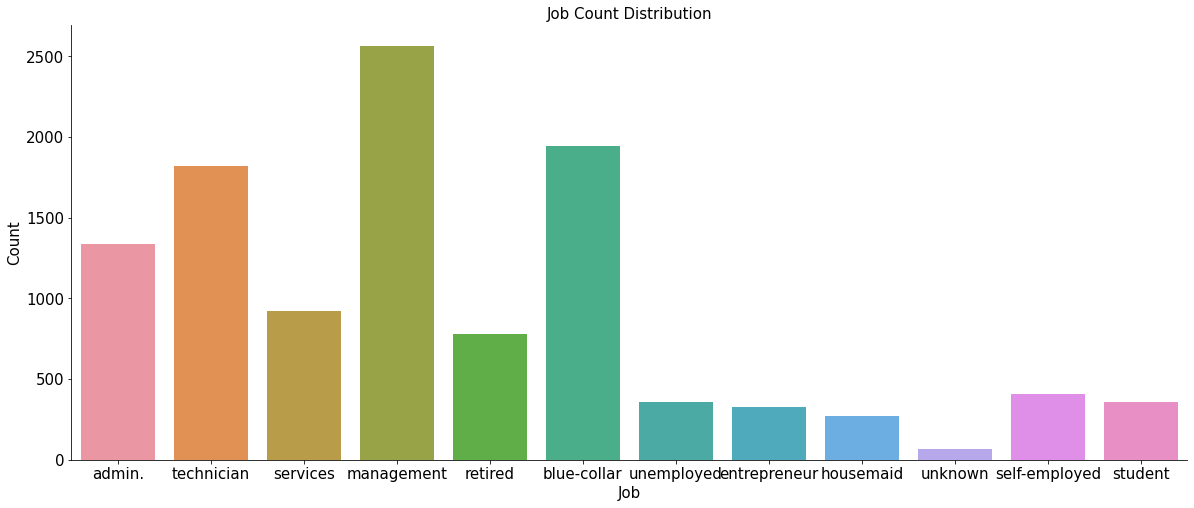

In [178]:
# Using count plot for job column to check the count of each category in job column
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x ='job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Blue collar workers are those who perform manual labor or skilled trade jobs that often involve physical work and are typically performed in a manufacturing or industrial setting. Examples include factory workers, construction workers, and mechanics..

White collar workers are those who work in an office, professional, managerial, or administrative work, typically performed in an office or corporate setting. Examples include accountants, engineers, managers, and lawyers.

### Making Category as Blue collar , White collar and others

In [179]:
# Define a function to categorize jobs
def categorize_job(job):
    if job in ['admin.', 'management', 'entrepreneur']:
        return 'white collar'
    elif job in ['blue-collar', 'housemaid']:
        return 'blue collar'
    else:
        return 'other'

# Apply the function to the "job" column and create a new "job_category" column
df['job_category'] = df['job'].apply(categorize_job)

In [180]:
# Looking for changes
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_group,job_category
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,other,yes,average balance,white collar
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,other,yes,low balance,white collar
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,other,yes,average balance,other
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,other,yes,average balance,other
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,other,yes,low balance,white collar


In [181]:
# Droping orignal column of job
df.drop(["job"],axis=1,inplace=True)

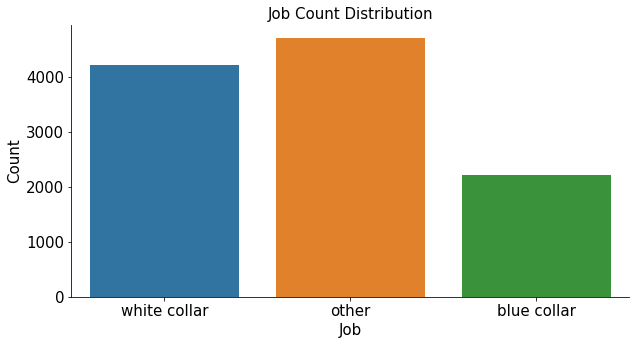

In [182]:
# Again using countplot for seeing changes 
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'job_category', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

## Univariate 

###Count plot for Numeric Variable

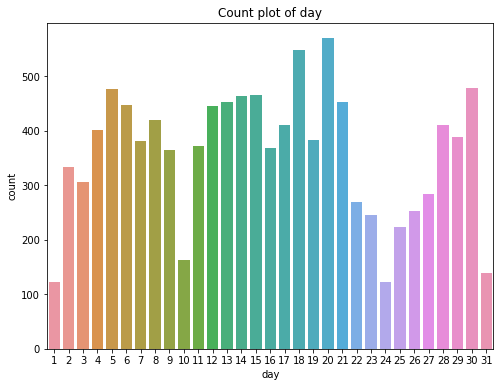

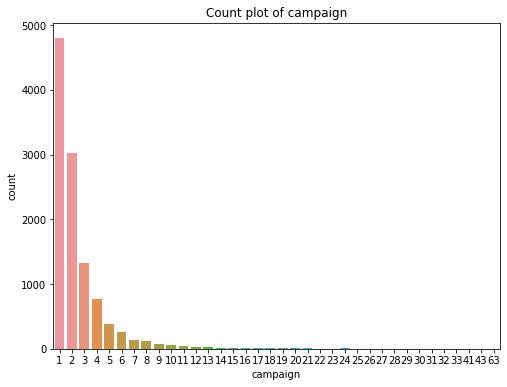

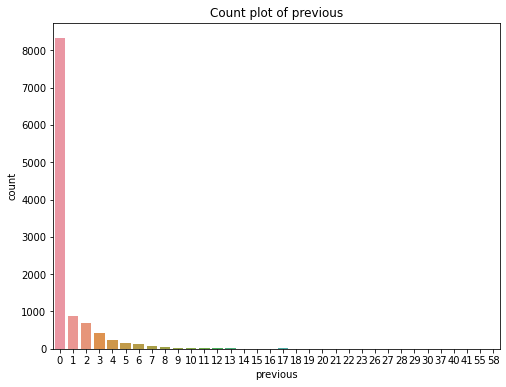

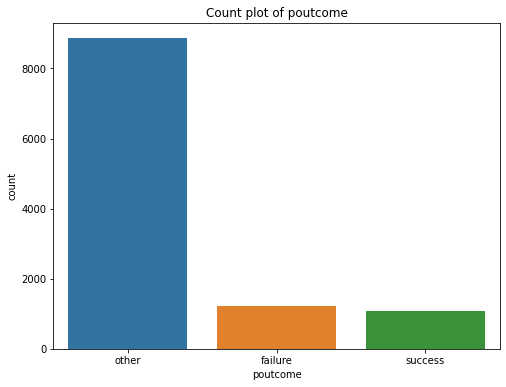

In [183]:
# day , campaign , previous , poutcome are countable numeric column
numeric_variables=[ 'day', 'campaign', 'previous','poutcome']
for variable in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=df)
    plt.title(f'Count plot of {variable}')
    plt.show()

* Day COlumn:We have 500 above count for day 18 and 20
* Campaign Column: We have more Count for Campaign 1 2 and 3 then other 63
* Previous Column:In previous we have more count for 0 and followed by 1 then so on
* Poutcome COlumn: We have More then 8000 count for other in Poutcome column




###Count Plot for Categorical Columns

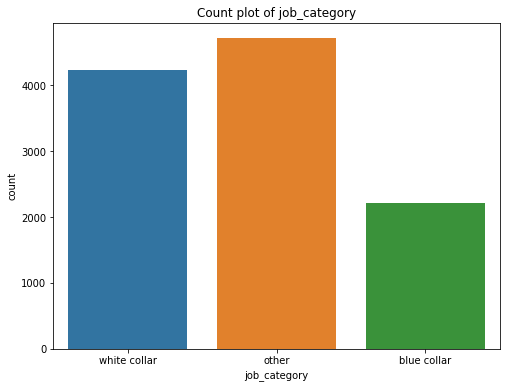

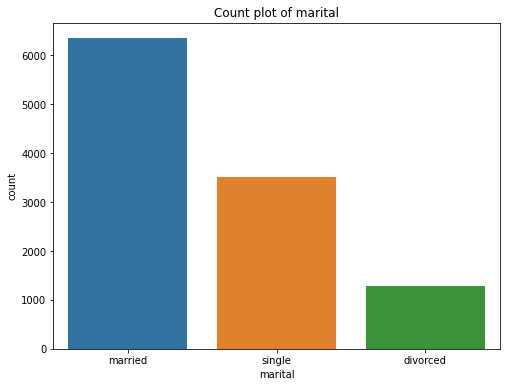

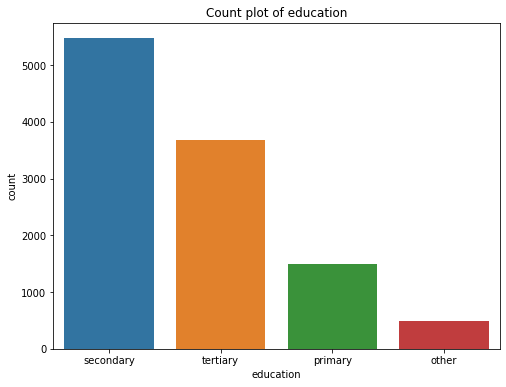

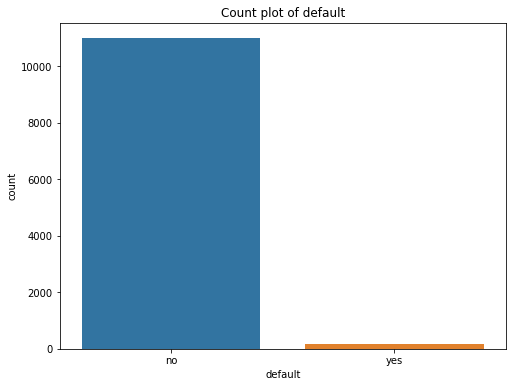

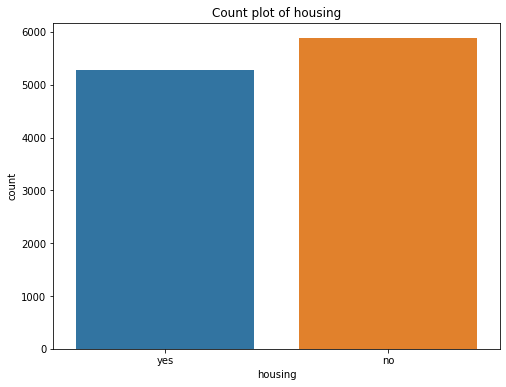

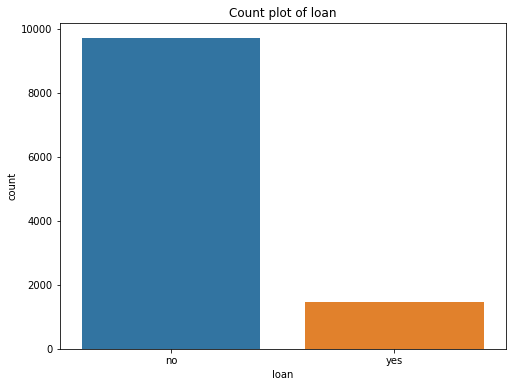

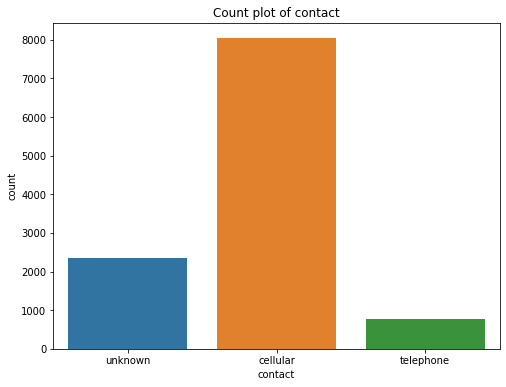

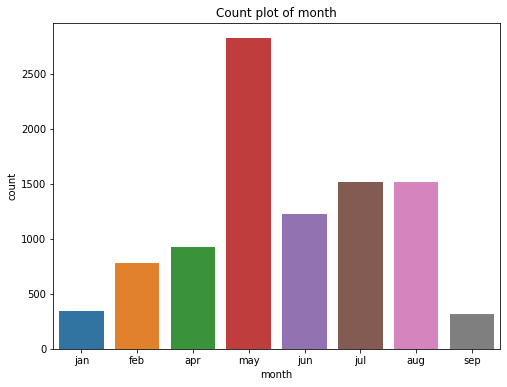

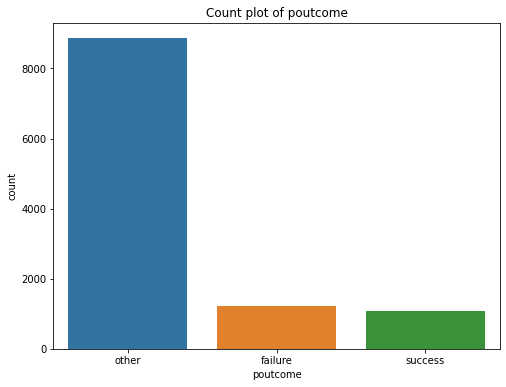

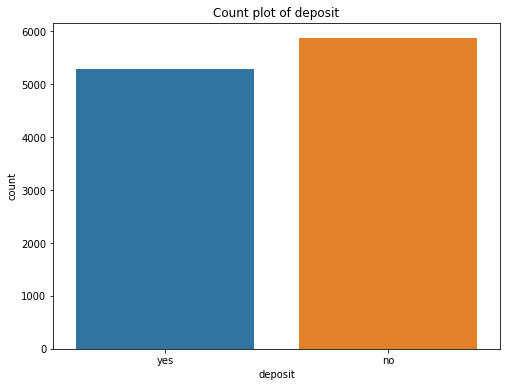

In [184]:
categorical_variables = ['job_category', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Create count plots for each categorical variable
for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=df)
    plt.title(f'Count plot of {variable}')
    plt.show()




    In Job Category Column we have more count for other followed by white collar then blue collar
    In Marital Column we have more count for Married followed by single then divorced
    In Education Column we have more count for Secondary followed by tertiary then primary and lastly other
    In Defaulter Column We have NUmber of less defaulter Count for No is much greater then yes
    In Housing Column we have more count for people who have not taken house loan
    In Loan Column we have more count for no i.e people are not interster in taking personal loan
    In COntact Column we have more count for cellular then unknown then lastlu telephone 
    In Month column we have more count for May then jul and aug and so on
    In Poutcome Column we have more count for other and almost same count for success and Failure
    In Deposit COlumn we have more count for No then Yes

### Subcription to the term deposit % of Total Clients

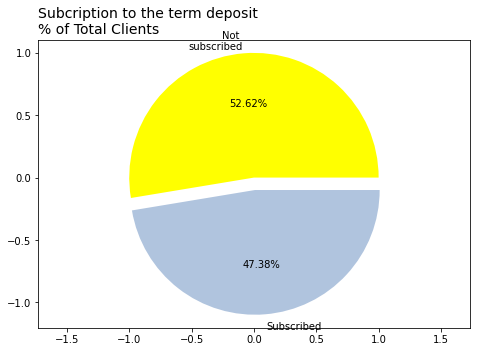

In [185]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([1.5,1.5,1,1]) 

ax.pie(df['deposit'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=10),
       colors = ['yellow', 'lightsteelblue']) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '14')

plt.show()

Based on the data provided, it appears that a higher percentage of clients are currently unsubscribed compared to those who have subscribed. Specifically, 52.62% of clients are unsubscribed while only 47.38% are subscribed. Although the difference between the two percentages is relatively small, it is still significant in terms of the number of clients impacted.

### Age Distribution

<Axes: xlabel='age', ylabel='Count'>

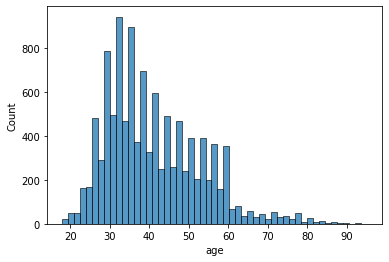

In [186]:
# Histogram for age distribution
sns.histplot(data = df, x='age')

We Can Observe that we have more client at age between 29 TO 40

# Bivariate

In [187]:
#Count customers age > 60
df[df['age'] > 60].count()['age']

611

In [188]:
#Age > 60 in %
a = df[df['age'] > 60].count()['age']
b = df.count()['age']

print('The % of customers with age > 60 is', round((a/b)*100, 2))

The % of customers with age > 60 is 5.47


In [189]:
#Age < 60 in %
c = df[df['age'] < 60].count()['age']
b = df.count()['age']
print('The % of customers with age < 60 is', round((c/b)*100, 2))

The % of customers with age < 60 is 93.01


###Checking age dispersion of age greater and equal to 60  on the basis of Marital Status
###NOTE : HOVER on bar to check the count and age


In [190]:
#Checking age dispersion
plt.figure(figsize=[20, 8])
colors = {'married':'#fbceb1', 'single':'#b2c7c8', 'divorced':'#ff5a68'}
px.histogram(df[df['age'] > 60], x='age', color='marital', color_discrete_map=colors)

<Figure size 1440x576 with 0 Axes>

* There are relatively few instances of individuals who are single within the age ranges of 60-70, 70-80, and 80-90.
* Specifically, there are only 6 individuals who are single between the ages of 60-70, 2 individuals who are single between the ages of 70-80, and another 2 individuals who are single between the ages of 80-90.
* In contrast, the count for divorced individuals is around 50 for the 60-70 age group and the same for the 70-80 age group.
* The count for individuals above 80 years old and divorced is 20.

###Checking age dispersion of age greater and equal to 60  on the basis of LOAN Status

In [191]:
#Checking age dispersion
plt.figure(figsize=[20, 8])
colors = {'yes':'#a2c892', 'no':'#05c4bc'}
px.histogram(df[df['age'] > 60], x='age', color='loan', color_discrete_map=colors)

<Figure size 1440x576 with 0 Axes>

Based on the data provided, it appears that there are a relatively small number of individuals within the age ranges of 60-70 and 70-80 who have taken out a personal loan. Specifically, there are 8 individuals between the ages of 60-70 who have taken out a personal loan, 1 individual between the ages of 70-80 who has taken out a personal loan, and no individuals above the age of 80 who have taken out a personal loan.

###Checking age dispersion of age greater and equal to 60  on the basis of House Loan Status

In [192]:
#Checking age dispersion
plt.figure(figsize=[20, 8])
colors = {'yes':"#fa8072","no":"#559a90"}
px.histogram(df[df['age'] > 60], x='age', color='housing',color_discrete_map=colors)

<Figure size 1440x576 with 0 Axes>

Based on the data provided, it appears that there are a relatively small number of individuals within the age range of 70-80 who have taken out a house loan compared to those between the ages of 60-70. Specifically, there are 39 individuals between the ages of 60-70 who have taken out a house loan, while only 9 individuals between the ages of 70-80 have taken out a house loan.

In [193]:
#Checking age dispersion
plt.figure(figsize=[20, 8])
colors = {'yes':'#a2c892', 'no':'#05c4bc'}
px.histogram(df[df['age'] > 60], x='age', color='deposit', color_discrete_map=colors)

<Figure size 1440x576 with 0 Axes>

### Average Event Durations by Month

<Axes: xlabel='month', ylabel='duration'>

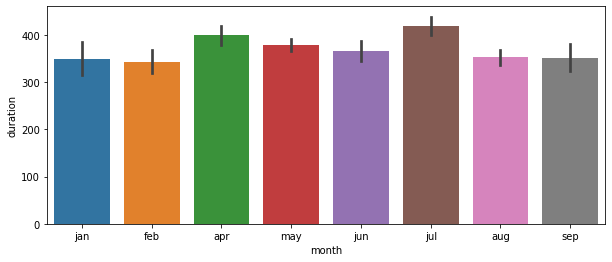

In [194]:
fig, (axis1) = plt.subplots(figsize=(10,4))
sns.barplot(x='month', y='duration', data=df, ax=axis1)

We can observe that the average duration of events is higher in the months of April and July by approximately 400 seconds.

## Multivariate Analysis

### Correlation Matrix

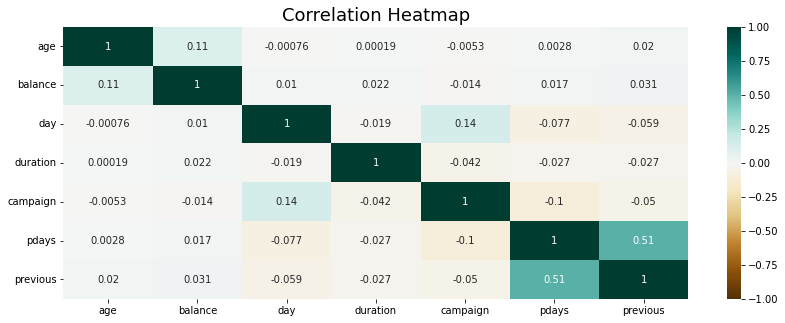

In [195]:
# Correlation matrix
plt.figure(figsize=(14, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18});

* Pdays and Previous are highly Coorelated
* Deposit and Duration are highly Coorelated 
* Pdays and Deposit are Coorelated 
* Previous and Deposit are Coorelated
* Balance and Age are Coorelated

###Relationship Between Job Type, Marketing Campaign Outcomes, and Deposit Behavior in Bank Clients

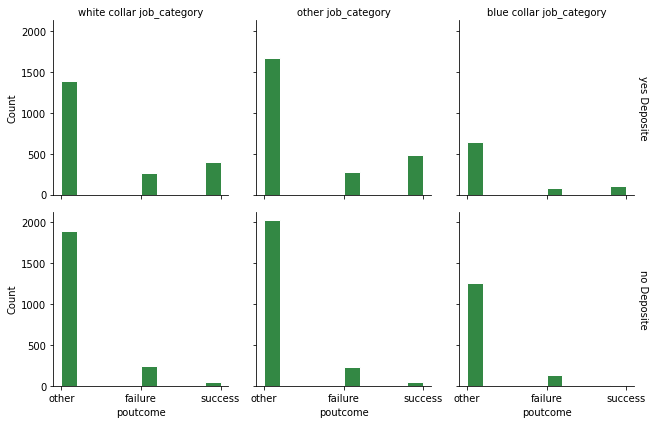

In [196]:

# Create a FacetGrid of histograms
g = sns.FacetGrid(df, col="job_category", row="deposit", margin_titles=True, height=3)

# Map the histogram to the grid
g.map(plt.hist, "poutcome", color="#338844", edgecolor="white")

# Set the x-axis label for all plots
g.set_axis_labels("poutcome", "Count")

# Add a title to each plot
g.set_titles(row_template="{row_name} Deposite", col_template="{col_name} job_category")


* poutcome: the outcome of the previous marketing campaign for this individual (categorical: 'other', 'failure', 'success')
* Clients who have made a deposit are more likely to have a white collar job compared to those who have not made a deposit.
* Clients who have made a deposit are more likely to have had a successful outcome in the previous marketing campaign compared to those who have not made a deposit.
* Clients who have not made a deposit are more likely to have other job types compared to white or blue collar jobs.
* Clients who have not made a deposit are more likely to have had a failure in the previous marketing campaign compared to those who have made a deposit.
* Clients with blue collar jobs who have not made a deposit are more likely to have had a failure in the previous marketing campaign and there were no individuals with this job type who made a deposit.


### Relationship between Campaign and Duration by Education and Marital Status

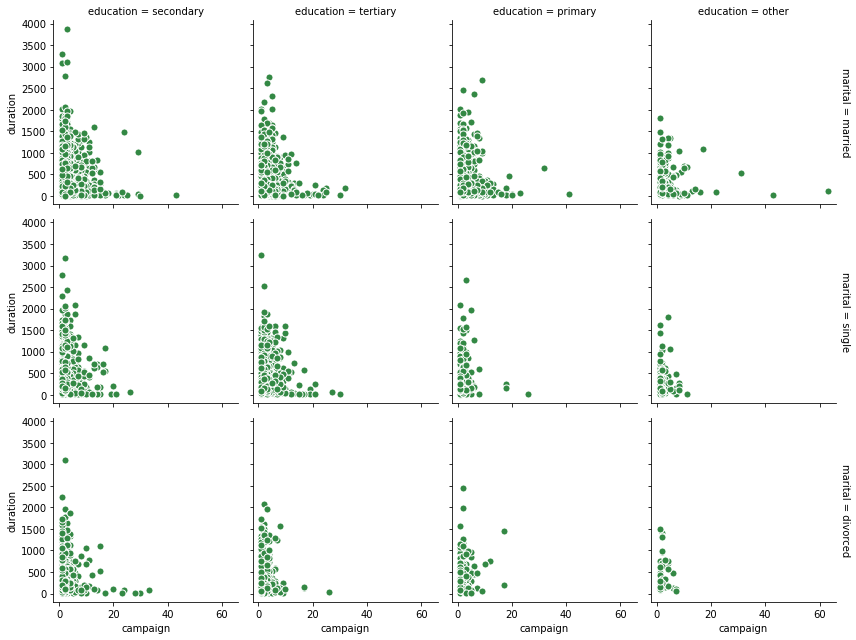

In [197]:
g = sns.FacetGrid(df, col="education", row="marital", margin_titles=True, height=3)
g.map(plt.scatter,  "campaign","duration", color="#338844", edgecolor="white", s=50, lw=1)

### Relationship between Account Balance, Personal Loans, Contacts and Marketing Campaign Success

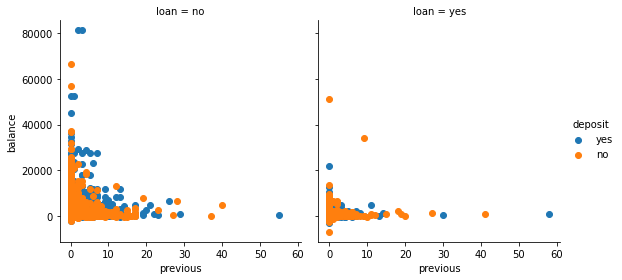

In [198]:
g = sns.FacetGrid(df, hue="deposit", col="loan", height=4)
g.map(plt.scatter,"previous","balance")
g.add_legend();


previous: the number of contacts performed before this campaign for this individual (numeric)

* Clients who have not taken a personal loan tend to have higher account balances and many of them have made deposits.
* The majority of clients have had between 0 and 30 contacts before this campaign.
* A few clients who have not made a deposit have had up to 40 previous contacts, while one client who made a deposit had 55 previous contacts.
* There are very few clients with account balances between 0 and 2000 euros who have not taken a personal loan and have had a high number of contacts performed before this campaign.
* This observation suggests that clients with low account balances may not be as responsive to marketing campaigns.
*These observations suggest that account balance and deposit behavior may be important factors in determining the success of a marketing campaign, and that previous contact history may also play a role.


### Relationship Between Campaign Contacts, Communication Method, and Client Deposits/Balances

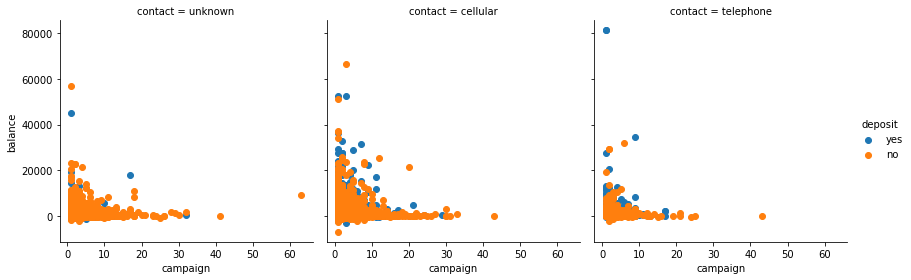

In [199]:
g = sns.FacetGrid(df, hue="deposit", col="contact", height=4)
g.map(plt.scatter,"campaign","balance")
g.add_legend();

* The "campaign" column in the dataset tracks the number of times the bank contacted an individual during the current marketing campaign.
* Clients who were contacted using cellular communication tend to have a higher number of campaign contacts than those contacted using telephone or unknown communication methods.
* Clients contacted using cellular communication also tend to have more deposits and higher account balances than those contacted using other methods.
* The relationship between the number of campaign contacts and account balance/deposits suggests that clients who are more digitally engaged may also be more financially stable or have a stronger relationship with the bank. 